In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df1 = df

In [4]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

In [5]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df1['Embarked'].fillna('S', inplace=True)

In [8]:
df1.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df1.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)

In [9]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [10]:
x = df1.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y = df1['Survived']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


[Text(435.7978403890161, 1058.5894736842106, 'X[2] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(193.92734553775745, 1001.3684210526317, 'X[1] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(74.05949656750573, 944.1473684210526, 'X[3] <= 2.5\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(63.84439359267735, 886.9263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(84.2745995423341, 886.9263157894737, 'X[6] <= 26.125\ngini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(56.18306636155607, 829.7052631578947, 'X[0] <= 48.0\ngini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(45.96796338672769, 772.4842105263158, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(66.39816933638444, 772.4842105263158, 'X[3] <= 55.5\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(56.18306636155607, 715.2631578947369, 'X[4] <= 0.5\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(30.64530892448513, 658.042105263158, 'X[0] <= 206.0\ngini = 0.059\nsa

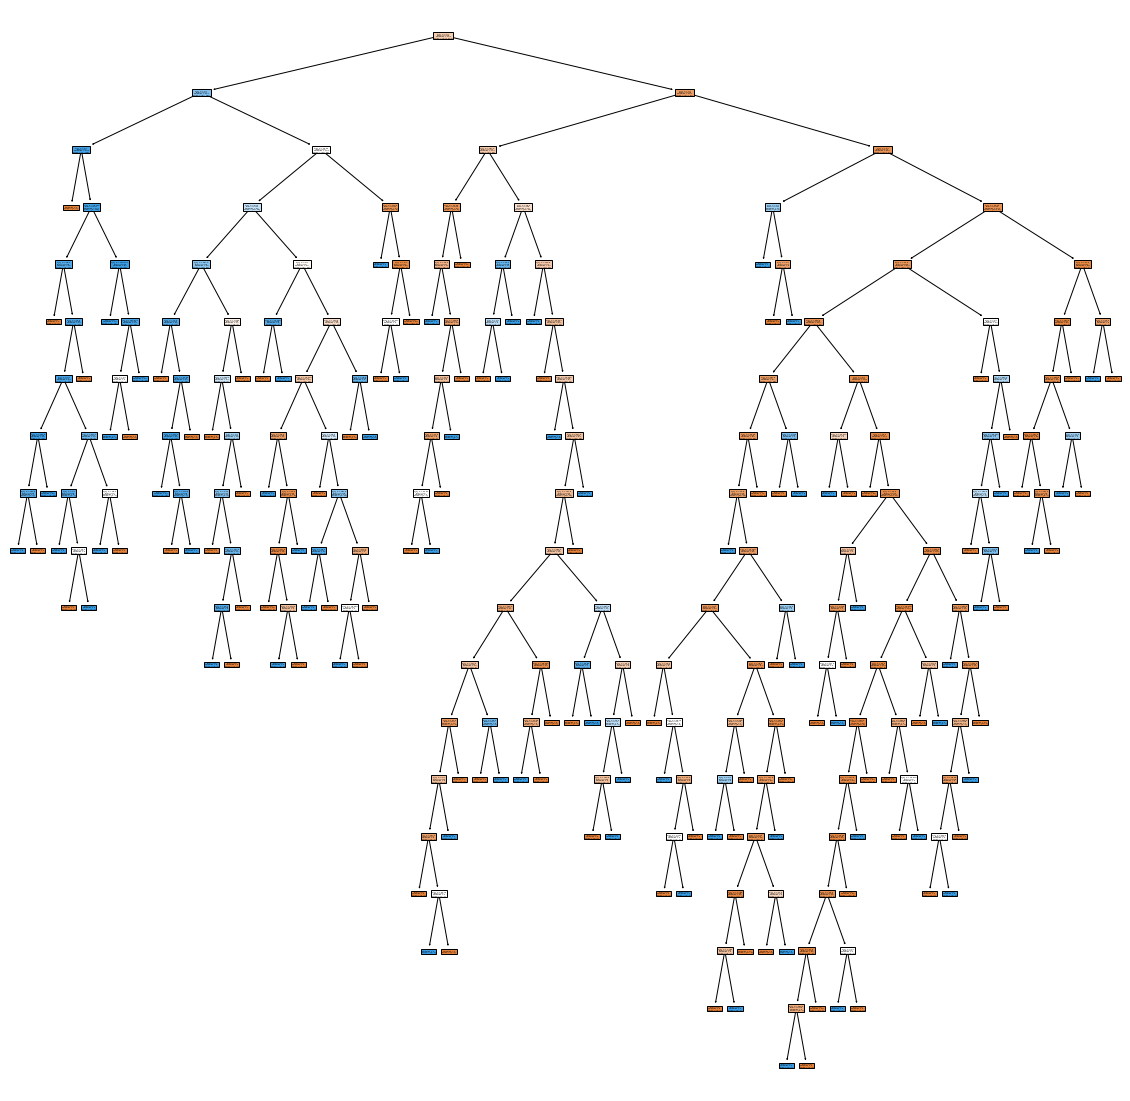

In [69]:
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True)

In [12]:
# Pruning now
# I will use the cost function post pruning method
# The method is from scikit-learn documentation

path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [13]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14020554642031396


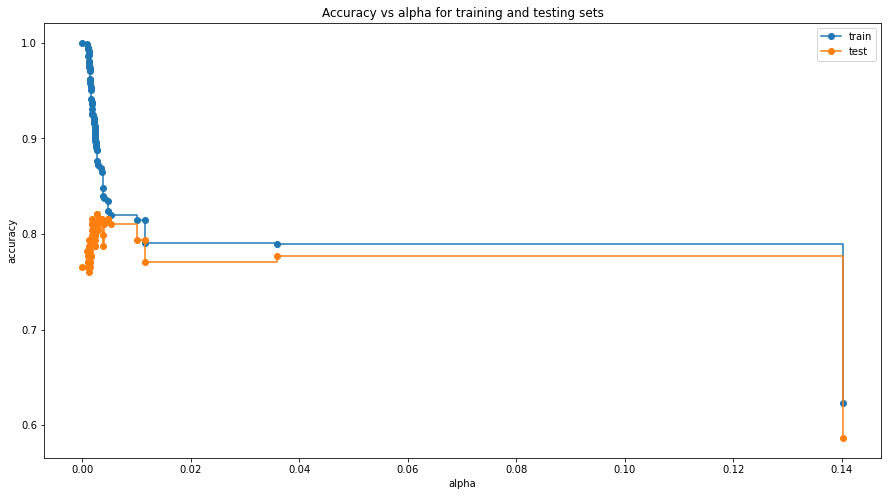

In [24]:
train_scores = [model.score(x_train, y_train) for model in models]
test_scores = [model.score(x_test, y_test) for model in models]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post" )
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [26]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [27]:
pred=clf.predict(_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8100558659217877

[Text(372.0, 475.65000000000003, 'X[2] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(186.0, 339.75, 'X[1] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(93.0, 203.85000000000002, 'gini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(279.0, 203.85000000000002, 'X[6] <= 23.35\ngini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(186.0, 67.94999999999999, 'gini = 0.484\nsamples = 95\nvalue = [39, 56]'),
 Text(372.0, 67.94999999999999, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(558.0, 339.75, 'X[1] <= 1.5\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(465.0, 203.85000000000002, 'gini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(651.0, 203.85000000000002, 'X[3] <= 3.5\ngini = 0.227\nsamples = 360\nvalue = [313, 47]'),
 Text(558.0, 67.94999999999999, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(744.0, 67.94999999999999, 'gini = 0.199\nsamples = 348\nvalue = [309, 39]')]

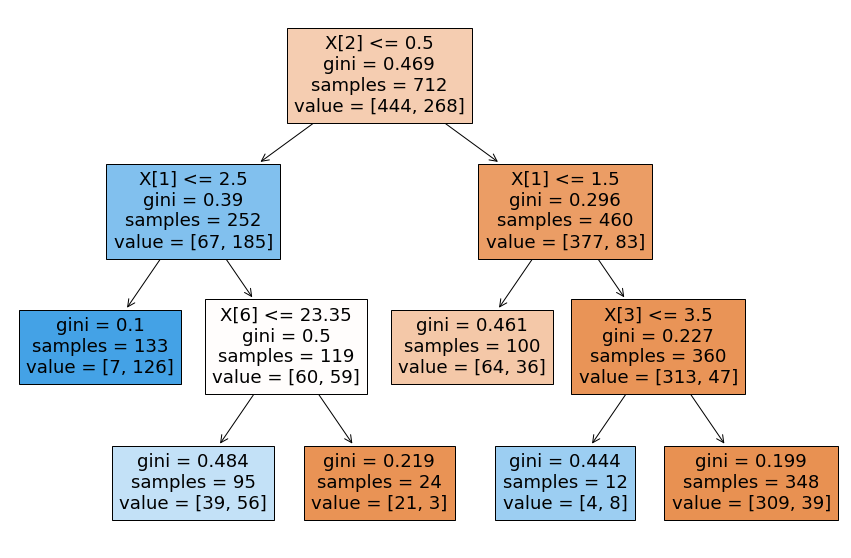

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [30]:
# Changing the decision tree parameters 
# Gini ---> Entropy
# RandomState = 10

model = tree.DecisionTreeClassifier(criterion='entropy', random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("New accuracy score:{}".format(accuracy_score(y_test, y_pred)))

New accuracy score:0.776536312849162


In [31]:
# The new accuracy score is less than the previous one

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Random forest accuracy score:{}".format(accuracy_score(y_test, y_pred)))


Random forest accuracy score:0.7988826815642458


In [33]:
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Random forest accuracy score:{}".format(accuracy_score(y_test, y_pred)))


Random forest accuracy score:0.8324022346368715


In [37]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Random forest accuracy score:{}".format(accuracy_score(y_test, y_pred)))


Random forest accuracy score:0.8547486033519553


In [38]:
# The higher the n_estimator, the better the accuracy of the model
# for n_estimator = 100 ---> accuracy = 85.47%